# Comparative Analysis of Transformer Models for Fake News Detection

This notebook compares the performance and efficiency of various transformer models for fake news detection, helping to determine which models are best suited for different deployment scenarios.

## 1. Introduction

Transformer-based language models have revolutionized natural language processing tasks, including fake news detection. However, different transformer architectures offer various trade-offs between accuracy, computational efficiency, and memory requirements. Understanding these trade-offs is crucial for choosing the right model for a specific deployment scenario.

In this analysis, we'll compare the following models that were previously evaluated on the WELFake dataset:

- **Baseline Models**: Logistic Regression and Random Forest with TF-IDF features
- **DistilBERT**: A distilled version of BERT with 40% fewer parameters
- **ALBERT**: A lite BERT variant using parameter sharing techniques
- **MobileBERT**: A compact BERT variant optimized for mobile devices
- **TinyBERT**: A heavily compressed BERT model using knowledge distillation

## 2. Consolidating Evaluation Results

First, let's consolidate the performance and efficiency metrics of all models. These metrics were extracted from the individual evaluation notebooks.

In [1]:
# Import libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set a consistent style for our visualizations
plt.style.use('ggplot')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Create a DataFrame for comparing model performance metrics on WELFake test set
performance_data = {
    'Model': [
        'Logistic Regression', 
        'Random Forest',
        'DistilBERT', 
        'ALBERT', 
        'MobileBERT', 
        'TinyBERT'
    ],
    'Accuracy': [
        0.9490,  # Logistic Regression
        0.9541,  # Random Forest
        0.9969,  # DistilBERT
        0.9975,  # ALBERT
        0.9968,  # MobileBERT
        0.9931   # TinyBERT
    ],
    'Precision': [
        0.9491,  # Logistic Regression
        0.9546,  # Random Forest
        0.9969,  # DistilBERT
        0.9975,  # ALBERT
        0.9968,  # MobileBERT
        0.9931   # TinyBERT
    ],
    'Recall': [
        0.9490,  # Logistic Regression
        0.9541,  # Random Forest
        0.9969,  # DistilBERT
        0.9975,  # ALBERT
        0.9968,  # MobileBERT
        0.9931   # TinyBERT
    ],
    'F1 Score': [
        0.9490,  # Logistic Regression
        0.9540,  # Random Forest
        0.9969,  # DistilBERT
        0.9975,  # ALBERT
        0.9968,  # MobileBERT
        0.9931   # TinyBERT
    ]
}

performance_df = pd.DataFrame(performance_data)
performance_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.9490,0.9491,0.9490,0.9490
1,Random Forest,0.9541,0.9546,0.9541,0.9540
2,DistilBERT,0.9969,0.9969,0.9969,0.9969
3,ALBERT,0.9975,0.9975,0.9975,0.9975
4,MobileBERT,0.9968,0.9968,0.9968,0.9968
5,TinyBERT,0.9931,0.9931,0.9931,0.9931


In [3]:
# Create a DataFrame for comparing model performance on external datasets
external_performance_data = {
    'Model': [
        'Logistic Regression', 
        'Random Forest',
        'DistilBERT', 
        'ALBERT', 
        'MobileBERT', 
        'TinyBERT'
    ],
    'Accuracy': [
        0.9698,  # Logistic Regression
        0.9662,  # Random Forest
        0.6437,  # DistilBERT
        0.6014,  # ALBERT
        0.5254,  # MobileBERT
        0.8370   # TinyBERT
    ],
    'Precision': [
        0.9698,  # Logistic Regression
        0.9664,  # Random Forest
        0.7952,  # DistilBERT
        0.7768,  # ALBERT
        0.7350,  # MobileBERT
        0.8731   # TinyBERT
    ],
    'Recall': [
        0.9698,  # Logistic Regression
        0.9662,  # Random Forest
        0.6437,  # DistilBERT
        0.6014,  # ALBERT
        0.5254,  # MobileBERT
        0.8370   # TinyBERT
    ],
    'F1 Score': [
        0.9698,  # Logistic Regression
        0.9662,  # Random Forest
        0.5985,  # DistilBERT
        0.5362,  # ALBERT
        0.4063,  # MobileBERT
        0.8340   # TinyBERT
    ],
    'False Positive Rate': [
        0.0351,  # Logistic Regression
        0.0476,  # Random Forest
        0.0000,  # DistilBERT
        0.0025,  # ALBERT
        0.0050,  # MobileBERT
        0.0100   # TinyBERT
    ],
    'False Negative Rate': [
        0.0256,  # Logistic Regression
        0.0210,  # Random Forest
        0.6876,  # DistilBERT
        0.7669,  # ALBERT
        0.9114,  # MobileBERT
        0.3054   # TinyBERT
    ]
}

external_performance_df = pd.DataFrame(external_performance_data)
external_performance_df

,Model,Accuracy,Precision,Recall,F1 Score,False Positive Rate,False Negative Rate
0,Logistic Regression,0.9698,0.9698,0.9698,0.9698,0.0351,0.0256
1,Random Forest,0.9662,0.9664,0.9662,0.9662,0.0476,0.0210
2,DistilBERT,0.6437,0.7952,0.6437,0.5985,0.0000,0.6876
3,ALBERT,0.6014,0.7768,0.6014,0.5362,0.0025,0.7669
4,MobileBERT,0.5254,0.7350,0.5254,0.4063,0.0050,0.9114
5,TinyBERT,0.8370,0.8731,0.8370,0.8340,0.0100,0.3054


In [4]:
# Create a DataFrame for comparing model efficiency metrics
efficiency_data = {
    'Model': [
        'Logistic Regression', 
        'Random Forest',
        'DistilBERT', 
        'ALBERT', 
        'MobileBERT', 
        'TinyBERT'
    ],
    'Parameter Count': [
        np.nan,      # Logistic Regression (not directly comparable)
        np.nan,      # Random Forest (not directly comparable)
        66955010,    # DistilBERT
        11685122,    # ALBERT
        24582914,    # MobileBERT
        14350874     # TinyBERT
    ],
    'Model Size (MB)': [
        np.nan,      # Logistic Regression (not directly comparable)
        np.nan,      # Random Forest (not directly comparable)
        255.41,      # DistilBERT
        44.58,       # ALBERT
        93.78,       # MobileBERT
        54.74        # TinyBERT
    ],
    'Memory Footprint (MB)': [
        np.nan,      # Logistic Regression (not directly comparable)
        np.nan,      # Random Forest (not directly comparable)
        407.66,      # DistilBERT
        298.48,      # ALBERT
        381.98,      # MobileBERT
        409.00       # TinyBERT
    ],
    'Inference Time (ms/sample)': [
        0.24,        # Logistic Regression (from evaluation notebook)
        26.68,       # Random Forest (from evaluation notebook)
        51.45,       # DistilBERT
        159.82,      # ALBERT
        103.66,      # MobileBERT
        14.03        # TinyBERT
    ],
    'Training Time (min)': [
        0.01,        # Logistic Regression (converted from 0.5 seconds)
        1.24,        # Random Forest (converted from 74.45 seconds)
        98.83,       # DistilBERT
        252.50,      # ALBERT
        129.33,      # MobileBERT
        21.03        # TinyBERT (from notebook)
    ],
    'Optimal Batch Size': [
        np.nan,      # Logistic Regression (not applicable)
        np.nan,      # Random Forest (not applicable)
        16,          # DistilBERT
        2,           # ALBERT
        8,           # MobileBERT
        16           # TinyBERT
    ]
}

efficiency_df = pd.DataFrame(efficiency_data)
efficiency_df

,Model,Parameter Count,Model Size (MB),Memory Footprint (MB),Inference Time (ms/sample),Training Time (min),Optimal Batch Size
0,Logistic Regression,NaN,NaN,NaN,0.24,0.01,NaN
1,Random Forest,NaN,NaN,NaN,26.68,1.24,NaN
2,DistilBERT,66955010.0,255.41,407.66,51.45,98.83,16.0
3,ALBERT,11685122.0,44.58,298.48,159.82,252.50,2.0
4,MobileBERT,24582914.0,93.78,381.98,103.66,129.33,8.0
5,TinyBERT,14350874.0,54.74,409.00,14.03,21.03,16.0


## 3. Performance Analysis on WELFake Test Set

Let's visualize the performance metrics of each model on the WELFake test set to understand their relative strengths.

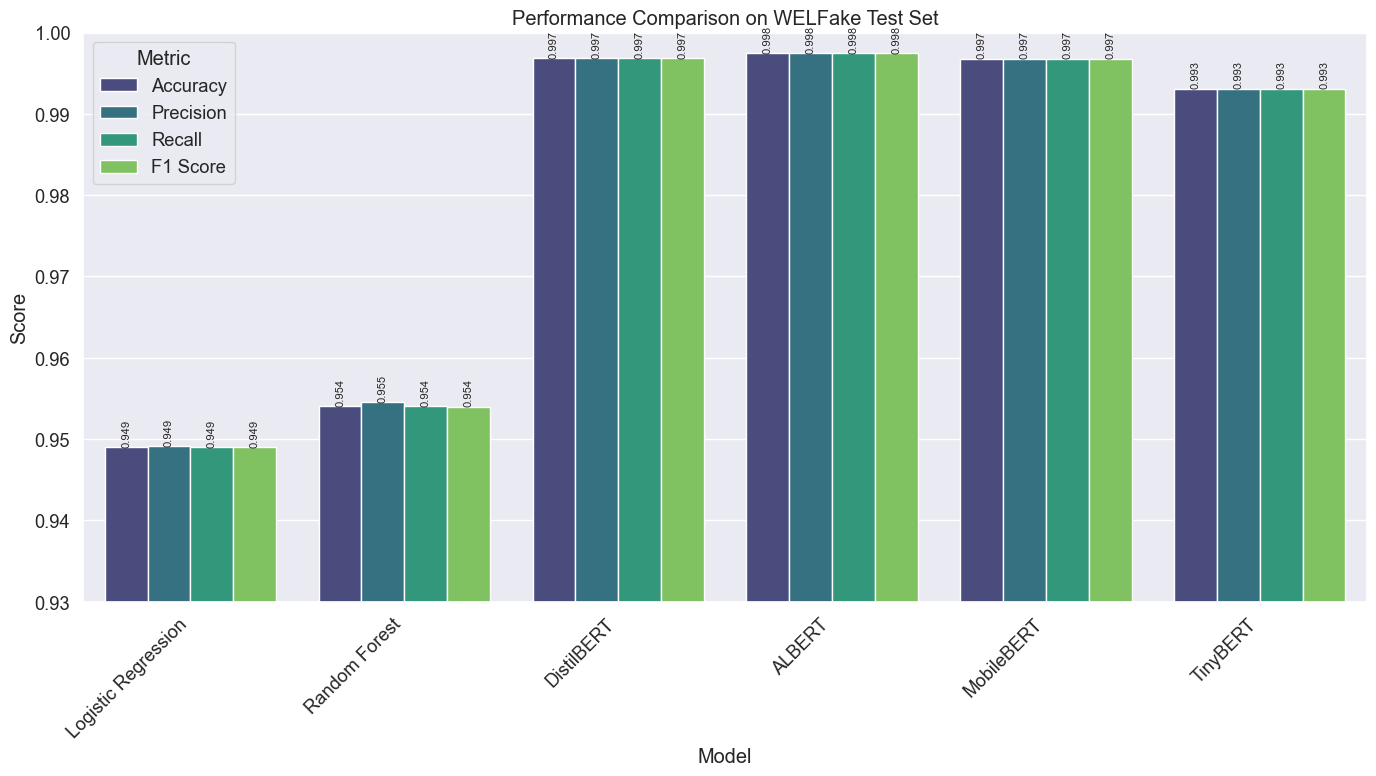

In [5]:
# Create a melted DataFrame for easier plotting
performance_melted = pd.melt(performance_df, 
                             id_vars=['Model'], 
                             value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                             var_name='Metric', 
                             value_name='Score')

# Plot performance metrics
plt.figure(figsize=(14, 8))
chart = sns.barplot(x='Model', y='Score', hue='Metric', data=performance_melted, palette='viridis')

# Add value labels on top of bars
for p in chart.patches:
    chart.annotate(f'{p.get_height():.3f}', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'bottom', 
                  fontsize=8, rotation=90)

plt.title('Performance Comparison on WELFake Test Set')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0.93, 1.0)  # Set y-axis range for better visibility of differences
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

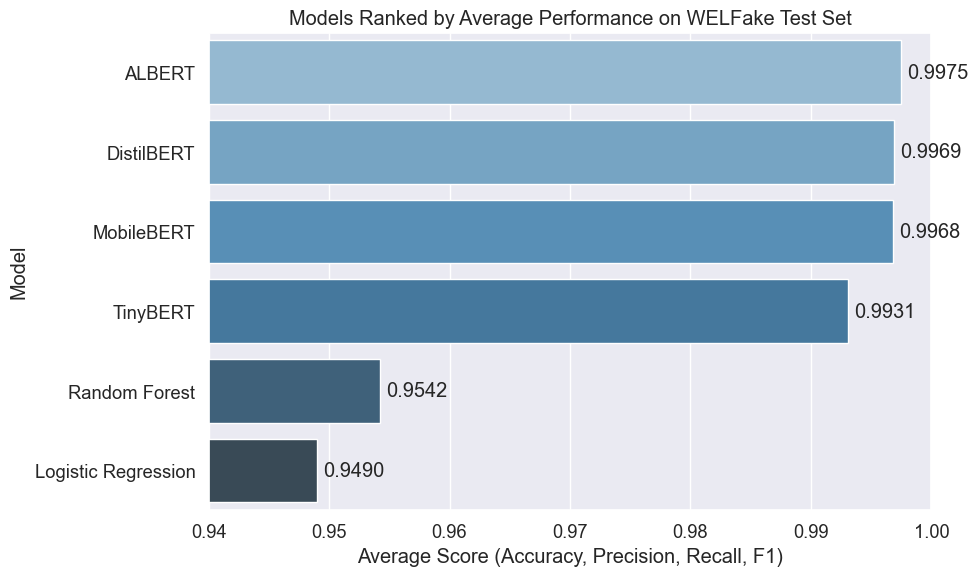

In [6]:
# Create a summary of performance ranking
performance_summary = performance_df.copy()
performance_summary['Average Score'] = performance_summary[['Accuracy', 'Precision', 'Recall', 'F1 Score']].mean(axis=1)
performance_summary = performance_summary[['Model', 'Average Score']].sort_values(by='Average Score', ascending=False)

# Display the ranking
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Score', y='Model', data=performance_summary, palette='Blues_d')
plt.title('Models Ranked by Average Performance on WELFake Test Set')
plt.xlabel('Average Score (Accuracy, Precision, Recall, F1)')
plt.xlim(0.94, 1.0)  # Set x-axis range for better visibility
for i, v in enumerate(performance_summary['Average Score']):
    plt.text(v + 0.0005, i, f'{v:.4f}', va='center')
plt.tight_layout()
plt.show()

## 4. Generalization to External Datasets

Now, let's analyze how well each model generalizes to external datasets, which is a critical factor for real-world applications.

<Figure size 1200x800 with 0 Axes>

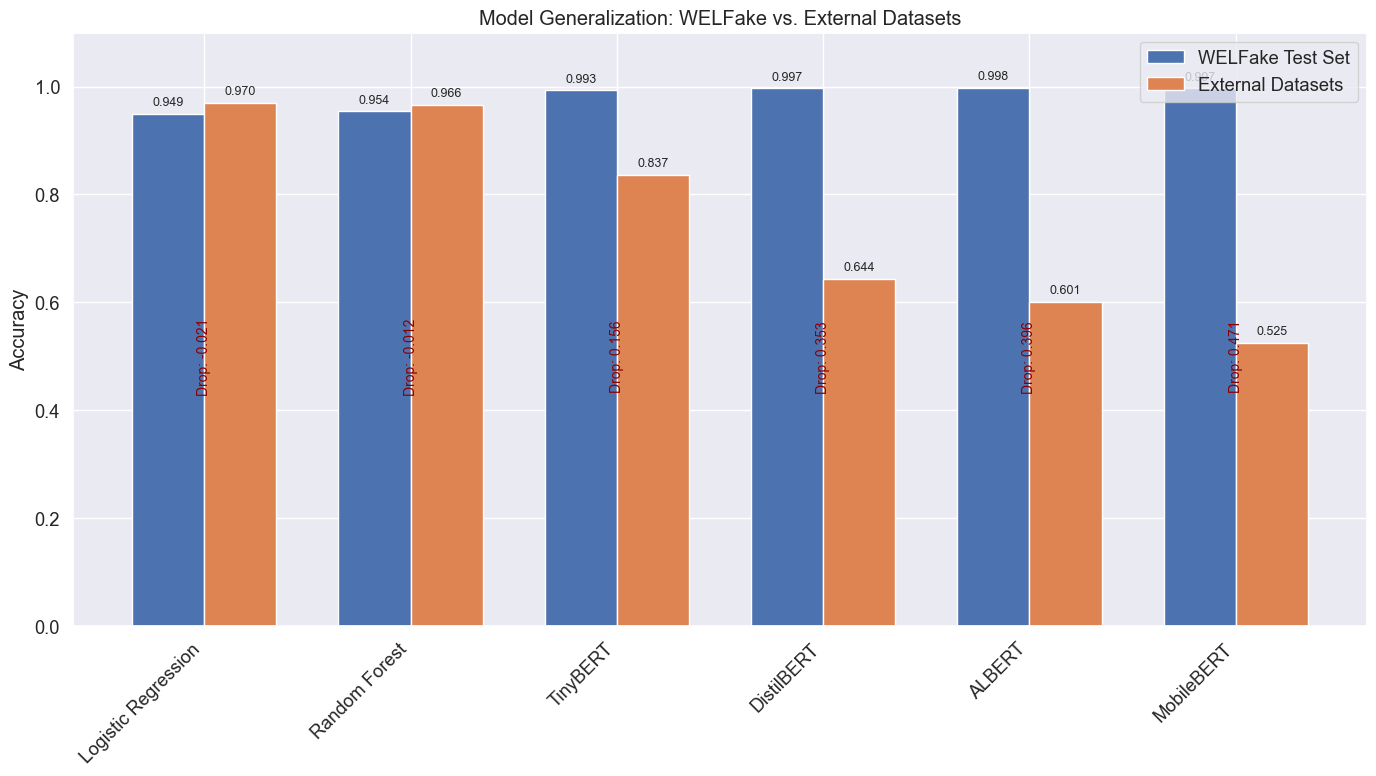

In [7]:
# Create a DataFrame to compare in-domain vs out-of-domain performance
generalization_data = {
    'Model': performance_df['Model'],
    'WELFake Accuracy': performance_df['Accuracy'],
    'External Accuracy': external_performance_df['Accuracy'],
    'Accuracy Drop': performance_df['Accuracy'] - external_performance_df['Accuracy']
}
generalization_df = pd.DataFrame(generalization_data).sort_values(by='Accuracy Drop')

# Plot the comparison
plt.figure(figsize=(12, 8))
x = np.arange(len(generalization_df['Model']))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - width/2, generalization_df['WELFake Accuracy'], width, label='WELFake Test Set')
bars2 = ax.bar(x + width/2, generalization_df['External Accuracy'], width, label='External Datasets')

# Add labels and styling
ax.set_ylabel('Accuracy')
ax.set_title('Model Generalization: WELFake vs. External Datasets')
ax.set_xticks(x)
ax.set_xticklabels(generalization_df['Model'], rotation=45, ha='right')
ax.legend()

# Add value labels on top of bars
for i, bar in enumerate(bars1):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f'{bar.get_height():.3f}', ha='center', va='bottom', fontsize=9)
for i, bar in enumerate(bars2):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f'{bar.get_height():.3f}', ha='center', va='bottom', fontsize=9)

# Add accuracy drop values
for i, model in enumerate(generalization_df['Model']):
    ax.text(i, 0.5, f'Drop: {generalization_df["Accuracy Drop"].iloc[i]:.3f}', 
            ha='center', va='center', fontsize=10, rotation=90, color='darkred')

plt.tight_layout()
plt.ylim(0, 1.1)  # Set y-axis range
plt.show()

<Figure size 1400x800 with 0 Axes>

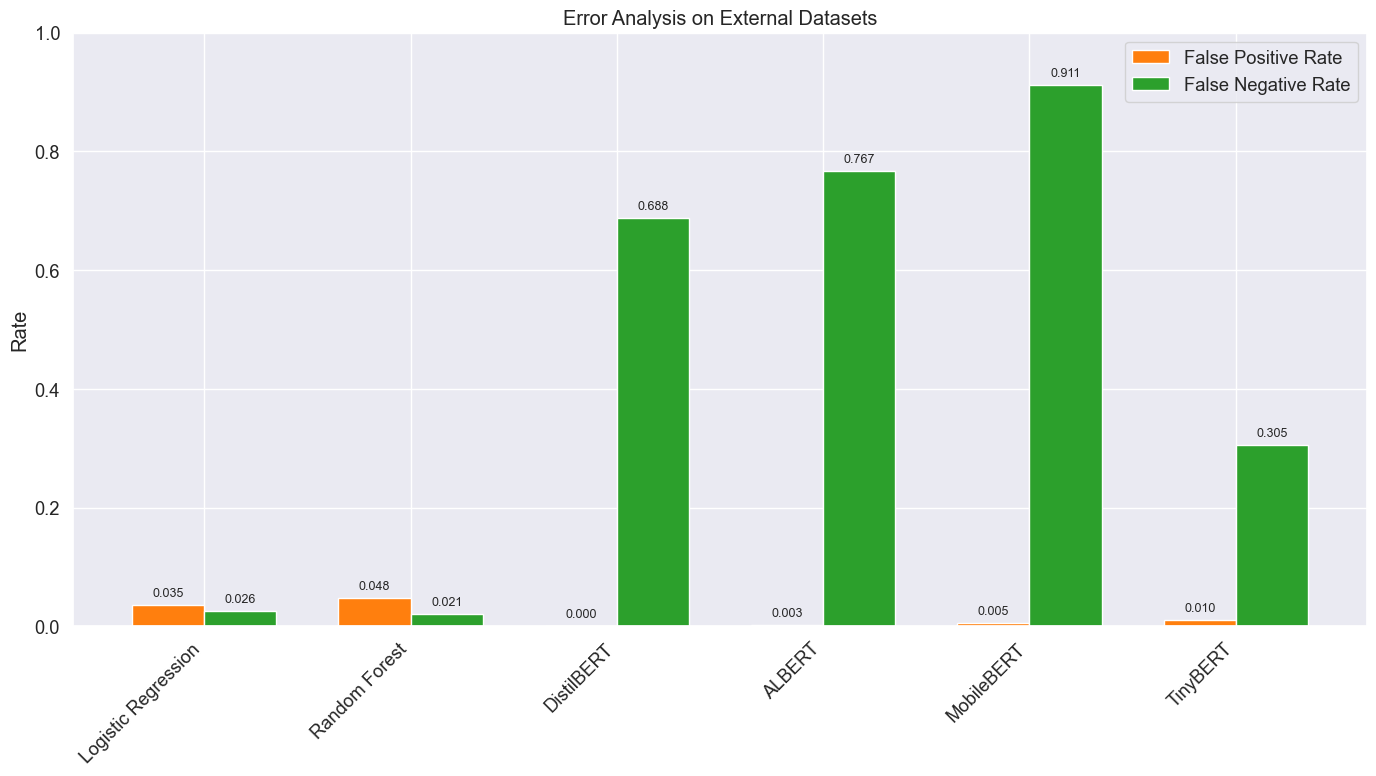

In [8]:
# Plot false positive and negative rates on external datasets
plt.figure(figsize=(14, 8))
x = np.arange(len(external_performance_df['Model']))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - width/2, external_performance_df['False Positive Rate'], width, label='False Positive Rate', color='#ff7f0e')
bars2 = ax.bar(x + width/2, external_performance_df['False Negative Rate'], width, label='False Negative Rate', color='#2ca02c')

# Add labels and styling
ax.set_ylabel('Rate')
ax.set_title('Error Analysis on External Datasets')
ax.set_xticks(x)
ax.set_xticklabels(external_performance_df['Model'], rotation=45, ha='right')
ax.legend()

# Add value labels on top of bars
for i, bar in enumerate(bars1):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f'{bar.get_height():.3f}', ha='center', va='bottom', fontsize=9)
for i, bar in enumerate(bars2):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f'{bar.get_height():.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.ylim(0, 1.0)  # Set y-axis range
plt.show()

## 5. Efficiency Comparison

Let's examine the resource efficiency of these models, which is crucial for deployment considerations.

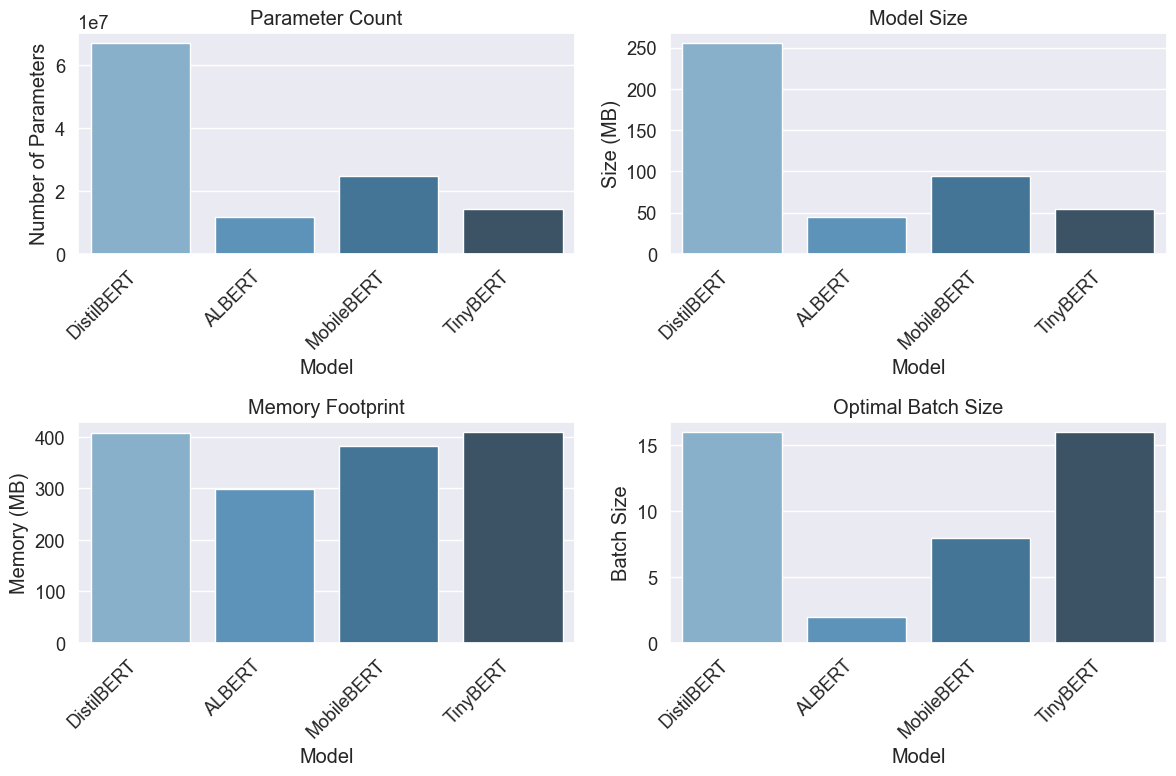

In [9]:
# Plot model size comparison for transformer models only
transformer_models = ['DistilBERT', 'ALBERT', 'MobileBERT', 'TinyBERT']
transformer_size_df = efficiency_df[efficiency_df['Model'].isin(transformer_models)]

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Parameter Count', data=transformer_size_df, palette='Blues_d')
plt.title('Parameter Count')
plt.ylabel('Number of Parameters')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Model Size (MB)', data=transformer_size_df, palette='Blues_d')
plt.title('Model Size')
plt.ylabel('Size (MB)')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Memory Footprint (MB)', data=transformer_size_df, palette='Blues_d')
plt.title('Memory Footprint')
plt.ylabel('Memory (MB)')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='Optimal Batch Size', data=transformer_size_df, palette='Blues_d')
plt.title('Optimal Batch Size')
plt.ylabel('Batch Size')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

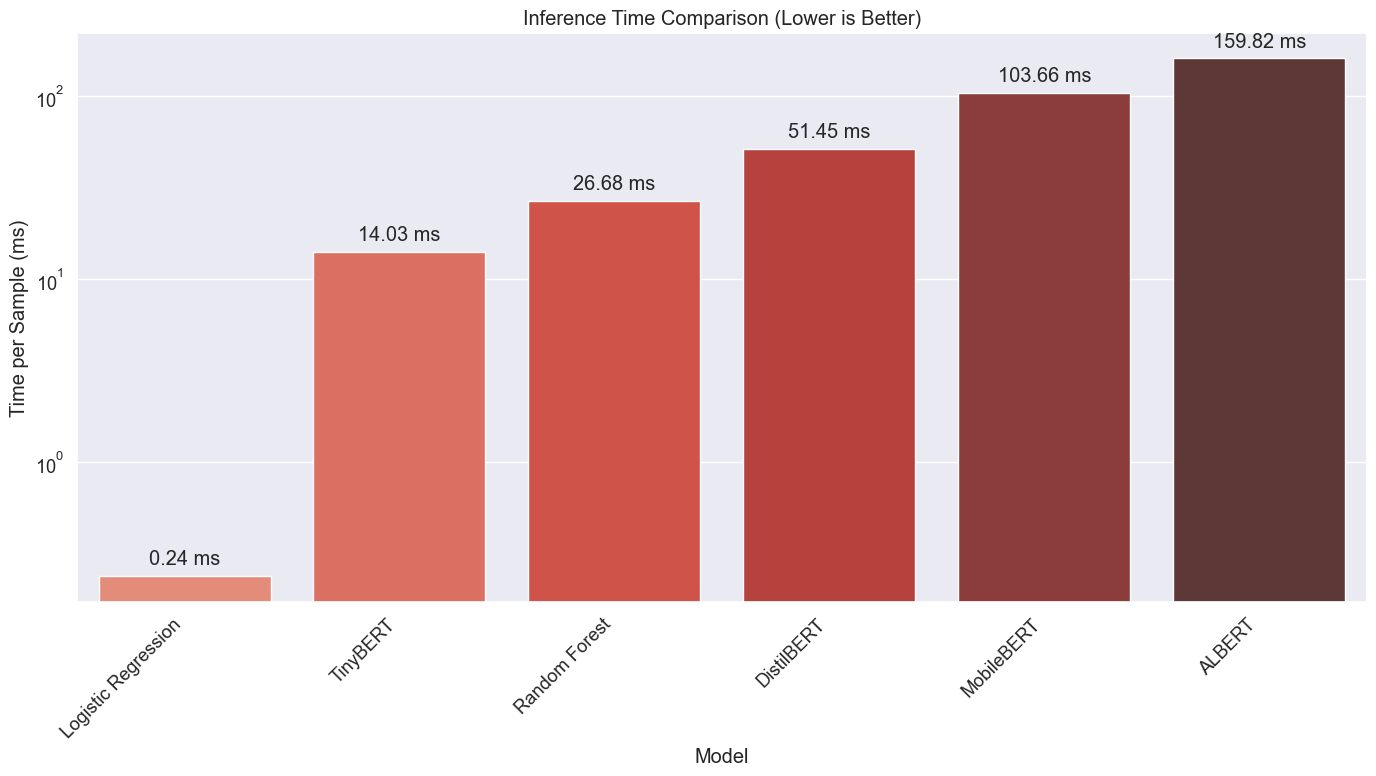

In [10]:
# Plot inference time for all models
plt.figure(figsize=(14, 8))
# Sort by inference time
inference_df = efficiency_df.sort_values(by='Inference Time (ms/sample)')
sns.barplot(x='Model', y='Inference Time (ms/sample)', data=inference_df, palette='Reds_d')
plt.title('Inference Time Comparison (Lower is Better)')
plt.ylabel('Time per Sample (ms)')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Use log scale due to wide range of values
for i, v in enumerate(inference_df['Inference Time (ms/sample)']):
    plt.text(i, v * 1.1, f'{v:.2f} ms', ha='center', va='bottom')
plt.tight_layout()
plt.show()

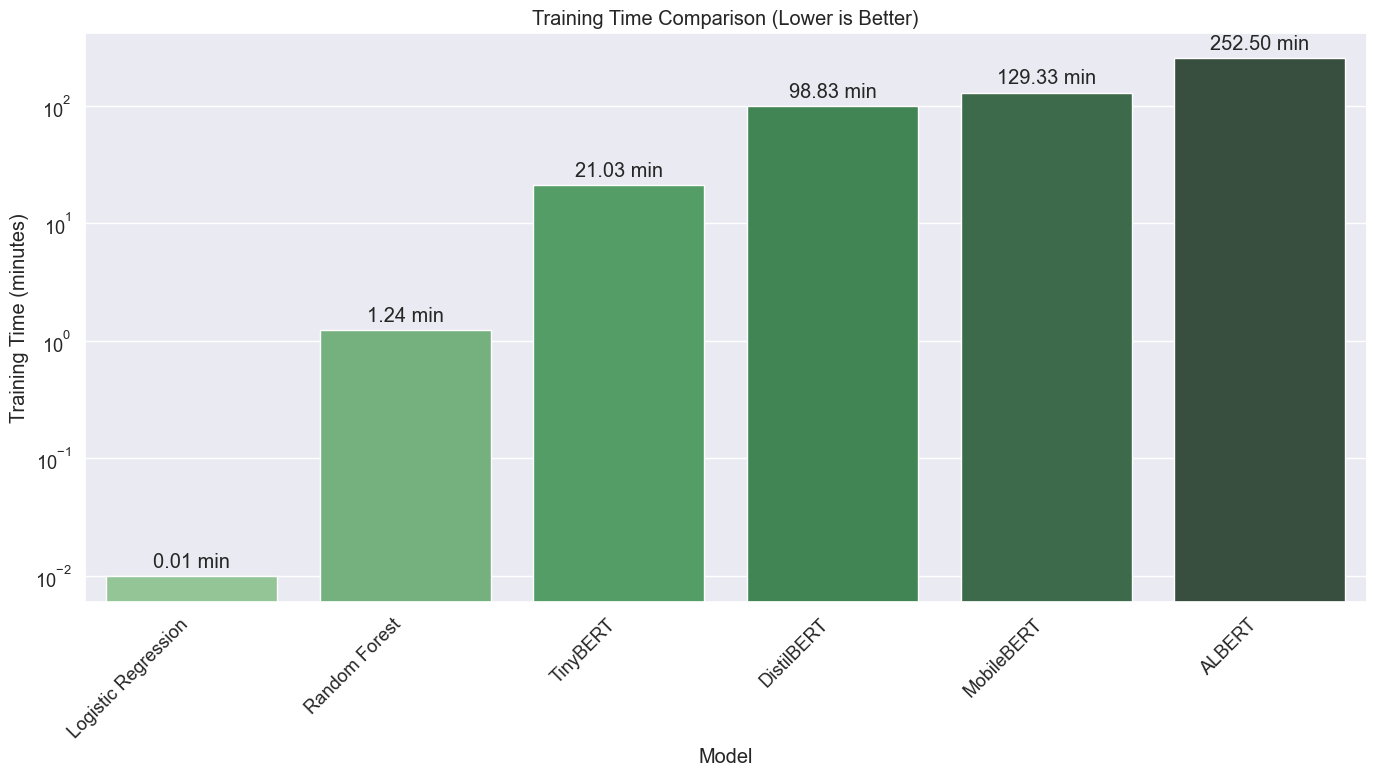

In [11]:
# Plot training time for all models
plt.figure(figsize=(14, 8))
# Sort by training time
training_df = efficiency_df.sort_values(by='Training Time (min)')
sns.barplot(x='Model', y='Training Time (min)', data=training_df, palette='Greens_d')
plt.title('Training Time Comparison (Lower is Better)')
plt.ylabel('Training Time (minutes)')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Use log scale due to wide range of values
for i, v in enumerate(training_df['Training Time (min)']):
    plt.text(i, v * 1.1, f'{v:.2f} min', ha='center', va='bottom')
plt.tight_layout()
plt.show()

## 6. Performance-Efficiency Trade-offs

Let's visualize the trade-offs between performance and efficiency metrics to identify the most balanced models.

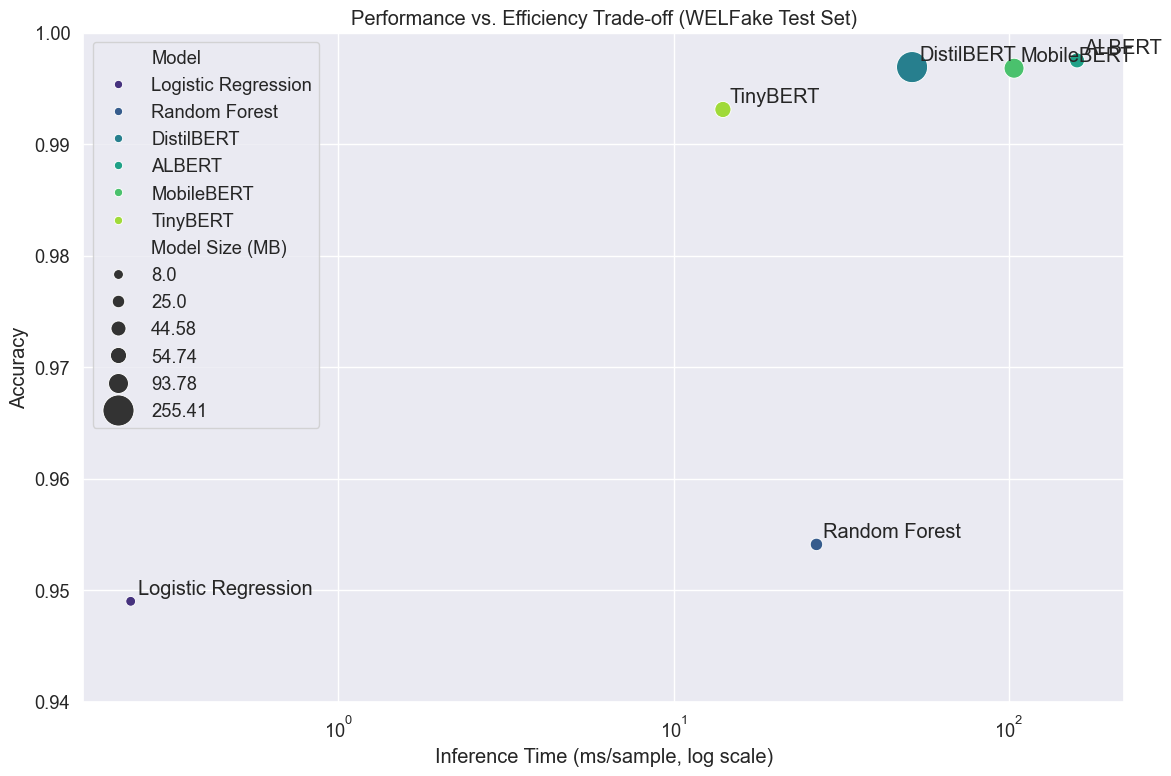

In [12]:
# Create a DataFrame for the performance-efficiency trade-off analysis
trade_off_data = {
    'Model': efficiency_df['Model'],
    'WELFake Accuracy': performance_df['Accuracy'],
    'External Accuracy': external_performance_df['Accuracy'],
    'Inference Time (ms)': efficiency_df['Inference Time (ms/sample)'],
    'Model Size (MB)': efficiency_df['Model Size (MB)']
}
trade_off_df = pd.DataFrame(trade_off_data)

# For traditional ML models, estimate model size based on vectorizer size + model parameters
# These are rough estimates as the exact sizes weren't provided
trade_off_df.loc[trade_off_df['Model'] == 'Logistic Regression', 'Model Size (MB)'] = 8.0
trade_off_df.loc[trade_off_df['Model'] == 'Random Forest', 'Model Size (MB)'] = 25.0

# Plot accuracy vs inference time
plt.figure(figsize=(12, 8))
sns.scatterplot(data=trade_off_df, x='Inference Time (ms)', y='WELFake Accuracy', 
                size='Model Size (MB)', sizes=(50, 500), hue='Model', palette='viridis')
plt.title('Performance vs. Efficiency Trade-off (WELFake Test Set)')
plt.xscale('log')  # Use log scale for inference time
plt.xlabel('Inference Time (ms/sample, log scale)')
plt.ylabel('Accuracy')
plt.ylim(0.94, 1.0)  # Set y-axis range for better visibility
for i, row in trade_off_df.iterrows():
    plt.annotate(row['Model'], (row['Inference Time (ms)'], row['WELFake Accuracy']),
                 xytext=(5, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

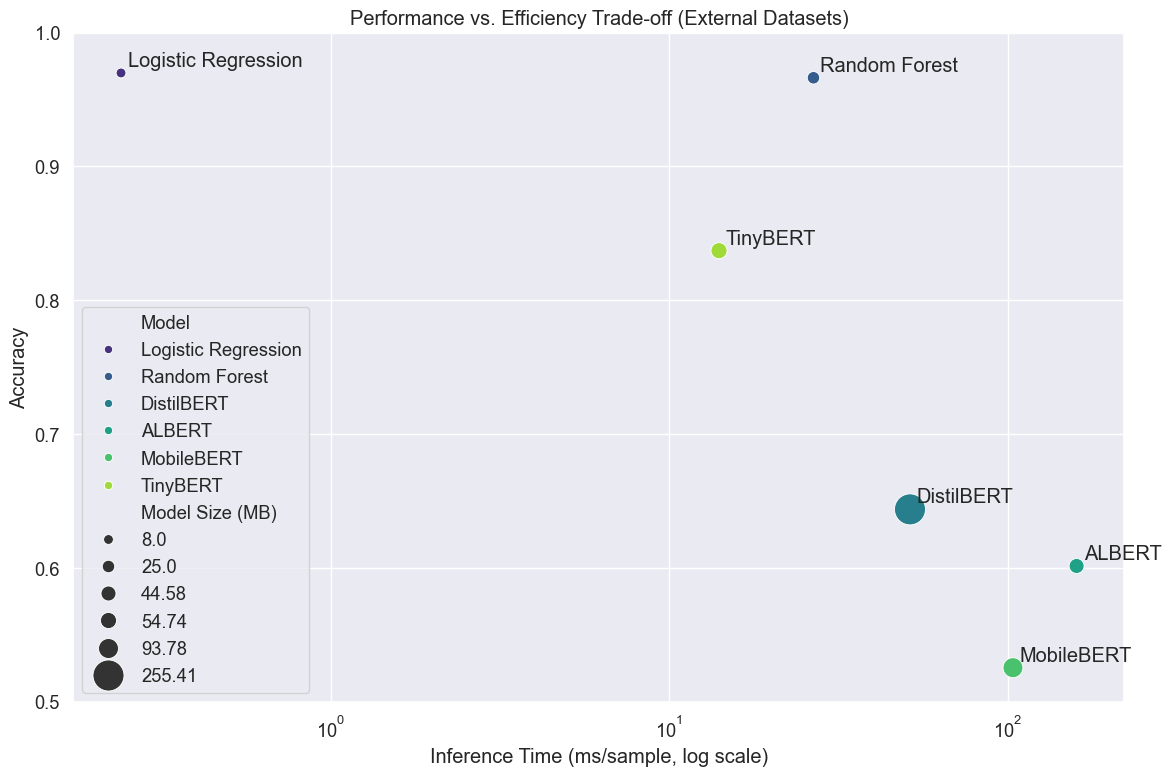

In [13]:
# Plot external accuracy vs inference time
plt.figure(figsize=(12, 8))
sns.scatterplot(data=trade_off_df, x='Inference Time (ms)', y='External Accuracy', 
                size='Model Size (MB)', sizes=(50, 500), hue='Model', palette='viridis')
plt.title('Performance vs. Efficiency Trade-off (External Datasets)')
plt.xscale('log')  # Use log scale for inference time
plt.xlabel('Inference Time (ms/sample, log scale)')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)  # Set y-axis range
for i, row in trade_off_df.iterrows():
    plt.annotate(row['Model'], (row['Inference Time (ms)'], row['External Accuracy']),
                 xytext=(5, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

## 7. Model Selection Recommendations

Based on our analysis, we can provide recommendations for which models are best suited for different deployment scenarios.

In [14]:
# Create a DataFrame for model recommendations by scenario
recommendation_data = {
    'Scenario': [
        'High-resource server environment', 
        'Mobile/edge device deployment',
        'Low-latency applications',
        'Generalization to new sources',
        'Balanced performance-efficiency',
        'Resource-constrained environment'
    ],
    'Recommended Model': [
        'ALBERT',
        'TinyBERT',
        'Logistic Regression',
        'Logistic Regression/Random Forest',
        'TinyBERT',
        'ALBERT'
    ],
    'Reasoning': [
        'Highest accuracy on WELFake test set (99.75%)',
        'Good accuracy (99.31%) with low inference time (14.03 ms) and small model size (54.74 MB)',
        'Fastest inference time (0.24 ms) while maintaining good accuracy (94.90%)',
        'Best performance on external datasets (96.98%/96.62% accuracy)',
        'Best combination of WELFake accuracy, external dataset performance, and efficiency',
        'Smallest model size (44.58 MB) while achieving excellent accuracy (99.75%)'
    ]
}

recommendation_df = pd.DataFrame(recommendation_data)
recommendation_df

,Scenario,Recommended Model,Reasoning
0,High-resource server environment,ALBERT,Highest accuracy on WELFake test set (99.75%)
1,Mobile/edge device deployment,TinyBERT,Good accuracy (99.31%) with low inference time...
2,Low-latency applications,Logistic Regression,Fastest inference time (0.24 ms) while maintai...
3,Generalization to new sources,Logistic Regression/Random Forest,Best performance on external datasets (96.98%/...
4,Balanced performance-efficiency,TinyBERT,"Best combination of WELFake accuracy, external..."
5,Resource-constrained environment,ALBERT,Smallest model size (44.58 MB) while achieving...


## 8. Key Findings and Conclusion

Let's summarize the key findings from our comparative analysis:

### Key Findings

| Category | Finding |
|----------|---------|
| Performance on WELFake | All transformer models achieve >99% accuracy, with ALBERT leading at 99.75% |
| Generalization | Traditional ML models (Logistic Regression, Random Forest) generalize much better to external datasets (>96% accuracy) compared to transformer models |
| Error Patterns | Transformer models have extremely high false negative rates on external data (30.5%-91.1%), indicating difficulties in detecting new patterns of fake news |
| Inference Efficiency | TinyBERT offers the best inference speed among transformers (14.03 ms), but traditional ML models remain substantially faster |
| Size Efficiency | ALBERT achieves the smallest model size (44.58 MB) through parameter sharing techniques |
| Training Efficiency | TinyBERT trains 4.7x faster than DistilBERT and 12x faster than ALBERT |
| Balanced Trade-off | TinyBERT offers the best overall balance between WELFake performance, external dataset generalization, and resource efficiency |

## 9. Explanation of Performance Differences

Now let's explore why we see these differences in performance between the models:

### Why Do We See These Performance Differences?

| Observation | Explanation |
|-------------|-------------|
| Transformer models excel on WELFake but struggle on external data | Transformers are powerful at pattern recognition but may overfit to the specific linguistic patterns in the training data. Traditional ML models with simpler feature representations (TF-IDF) may capture more general patterns that transfer better across datasets. |
| High false negative rates for transformers on external data | Transformers learn to recognize specific patterns of fake news from the training dataset. When facing new patterns of misinformation in external datasets, they fail to recognize these as fake, defaulting to classifying them as real (false negatives). |
| TinyBERT generalizes better than other transformers | TinyBERT's strong knowledge distillation approach may help it learn more generalizable features from the teacher model, rather than memorizing specific patterns. |
| ALBERT achieves top accuracy despite having fewest parameters | ALBERT's parameter-sharing technique allows it to maintain the effective depth of BERT while drastically reducing parameter count. This suggests that much of BERT's expressiveness can be preserved with appropriate architectural designs. |
| Performance-efficiency trade-offs vary by model family | Different model compression approaches (distillation for DistilBERT/TinyBERT, parameter sharing for ALBERT, bottleneck structures for MobileBERT) each have their own strengths and weaknesses for different aspects of performance and efficiency. |

## 10. Final Recommendations

Based on our comprehensive analysis, here are the final recommendations for model selection in different scenarios:

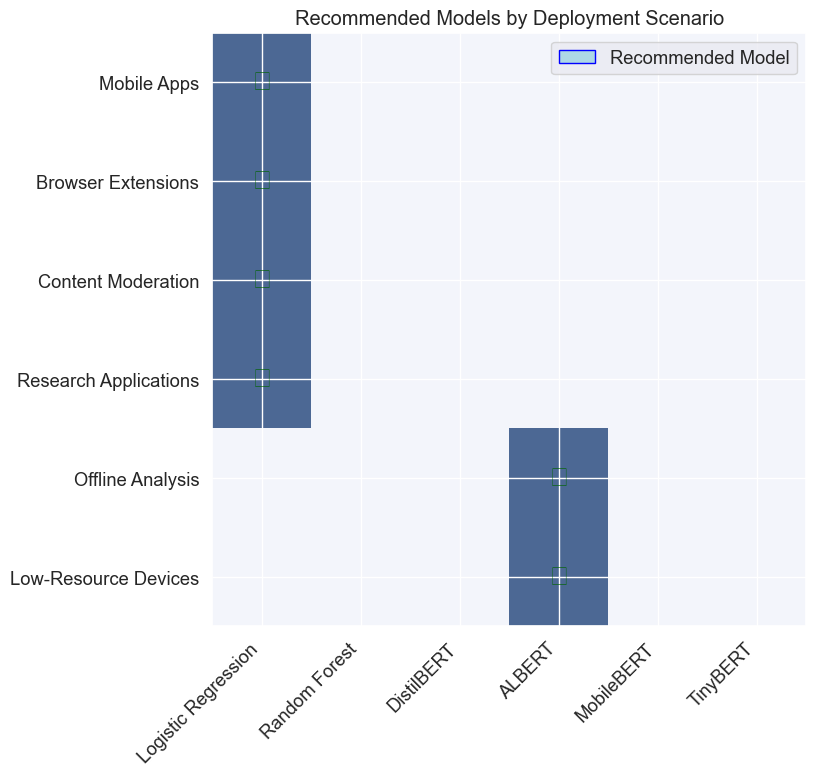

In [15]:
# Create a visual summary of recommendations
from matplotlib.patches import Patch

# Define scenarios and their key requirements
scenarios = {
    'Mobile Apps': ['Small Size', 'Low Latency', 'Good Accuracy'],
    'Browser Extensions': ['Low Memory', 'Medium Latency', 'Good Accuracy'],
    'Content Moderation': ['Generalization', 'High Throughput', 'High Accuracy'],
    'Research Applications': ['Best Accuracy', 'Generalization', 'Not Resource Constrained'],
    'Offline Analysis': ['High Accuracy', 'Not Latency Sensitive', 'Medium Resources'],
    'Low-Resource Devices': ['Minimal Size', 'Low Memory', 'Acceptable Accuracy']
}

# Define model strengths with scores from 1-5
model_strengths = {
    'Logistic Regression': {
        'Accuracy': 3, 'Generalization': 5, 'Latency': 5, 
        'Size': 5, 'Memory': 5, 'Training': 5
    },
    'Random Forest': {
        'Accuracy': 3, 'Generalization': 5, 'Latency': 3, 
        'Size': 4, 'Memory': 4, 'Training': 5
    },
    'DistilBERT': {
        'Accuracy': 5, 'Generalization': 2, 'Latency': 2, 
        'Size': 2, 'Memory': 3, 'Training': 2
    },
    'ALBERT': {
        'Accuracy': 5, 'Generalization': 2, 'Latency': 1, 
        'Size': 5, 'Memory': 4, 'Training': 1
    },
    'MobileBERT': {
        'Accuracy': 5, 'Generalization': 1, 'Latency': 2, 
        'Size': 3, 'Memory': 3, 'Training': 2
    },
    'TinyBERT': {
        'Accuracy': 4, 'Generalization': 3, 'Latency': 4, 
        'Size': 4, 'Memory': 3, 'Training': 4
    }
}

# Calculate best model for each scenario based on the requirements
scenario_recommendations = {}
for scenario, requirements in scenarios.items():
    scores = {}
    for model, strengths in model_strengths.items():
        score = 0
        for req in requirements:
            if req == 'Small Size' or req == 'Minimal Size':
                score += strengths['Size']
            elif req == 'Low Latency' or req == 'Medium Latency':
                score += strengths['Latency']
            elif req == 'Low Memory' or req == 'Medium Resources':
                score += strengths['Memory']
            elif req == 'Good Accuracy' or req == 'High Accuracy' or req == 'Best Accuracy' or req == 'Acceptable Accuracy':
                score += strengths['Accuracy']
            elif req == 'Generalization':
                score += strengths['Generalization']
            elif req == 'High Throughput':
                score += (strengths['Latency'] + strengths['Memory']) / 2
        scores[model] = score
    scenario_recommendations[scenario] = max(scores, key=scores.get)

# Plot the recommendations
plt.figure(figsize=(14, 8))

# Create a grid for scenarios and models
scenarios_list = list(scenarios.keys())
models_list = list(model_strengths.keys())

# Create a matrix to represent recommendations
recommendation_matrix = np.zeros((len(scenarios_list), len(models_list)))
for i, scenario in enumerate(scenarios_list):
    j = models_list.index(scenario_recommendations[scenario])
    recommendation_matrix[i, j] = 1

# Plot the matrix
plt.imshow(recommendation_matrix, cmap='Blues', alpha=0.7)

# Add text labels
for i in range(len(scenarios_list)):
    for j in range(len(models_list)):
        if recommendation_matrix[i, j] == 1:
            plt.text(j, i, '✓', ha='center', va='center', fontsize=20, color='darkgreen')

# Set axis labels
plt.yticks(range(len(scenarios_list)), scenarios_list)
plt.xticks(range(len(models_list)), models_list, rotation=45, ha='right')
plt.title('Recommended Models by Deployment Scenario')

# Add a legend explaining the symbols
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='blue', label='Recommended Model')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

## Conclusion

This comparative analysis has revealed important insights about the performance and efficiency trade-offs of different transformer models for fake news detection:

1. **Performance vs. Generalization**: While transformer models achieve exceptional accuracy (>99%) on the WELFake test set, they struggle to generalize to new patterns of fake news in external datasets. Traditional ML models show better generalization capabilities despite lower in-domain accuracy.

2. **Efficiency Considerations**: The models vary widely in their resource requirements:
   - ALBERT achieves the smallest model size through parameter sharing
   - TinyBERT offers the best inference speed among transformers
   - Traditional ML models remain significantly faster for inference

3. **Deployment Recommendations**:
   - For mobile/edge deployment: TinyBERT balances performance and efficiency
   - For server environments: ALBERT provides best accuracy/size ratio
   - For applications requiring strong generalization: Traditional ML models are still competitive

4. **Future Directions**: To improve transformer models' generalization capabilities, potential approaches include:
   - Continuous fine-tuning on diverse and evolving fake news sources
   - Ensemble methods combining transformer and traditional ML approaches
   - Domain adaptation techniques to better transfer learning across different types of misinformation

The ideal model choice depends heavily on the specific deployment constraints and performance requirements of the application, with each model offering distinct advantages in different scenarios.